# Tugas Data Mining - EDA
## Kelompok 1 
Anggota Kelompok:
- Rahmawati (11160940000035)
- Danny Yoga Alfarizki (11160940000049)
- Wahyu Triwulan Asih (11160940000074)
- Syihabudin Asy'ari (11160940000085)
- Fathu Rahman (11170940000028)
- Yulia Amandari (11170940000041)
- Reza Khaerul I (11170940000044)
- Ivansyah (11170940000047)
- Hany Rahmanita (11170940000060)

In [1]:
import pandas as pd
import numpy as np
from itertools import combinations
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import plotly.graph_objects as go
import plotly.figure_factory as ff
%matplotlib inline

# Data 1 

In [2]:
data1=pd.read_csv('data/covid_19_data.csv')

In [3]:
total=data1.isnull().sum().sort_values(ascending=False)
percentage=(data1.isnull().sum()/data1.isnull().count()).sort_values(ascending=False)
miss_val=pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])
miss_val.head(20)

,Total,Percentage
Province/State,6562,0.485032
Recovered,0,0.000000
Deaths,0,0.000000
Confirmed,0,0.000000
Last Update,0,0.000000
Country/Region,0,0.000000
ObservationDate,0,0.000000
SNo,0,0.000000


In [4]:
data1.drop(columns=miss_val[miss_val['Percentage']>=0.4].index,inplace=True)
data1.drop(columns='SNo',inplace=True)

In [5]:
data1.ObservationDate=data1.ObservationDate.astype('datetime64')
data1['Last Update']=data1['Last Update'].astype('datetime64')

In [6]:
data1.head()

,ObservationDate,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,2020-01-22,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
1,2020-01-22,Mainland China,2020-01-22 17:00:00,14.0,0.0,0.0
2,2020-01-22,Mainland China,2020-01-22 17:00:00,6.0,0.0,0.0
3,2020-01-22,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
4,2020-01-22,Mainland China,2020-01-22 17:00:00,0.0,0.0,0.0


Data diatas merupakan data jumlah kasus, kesembuhan dan kematian baru per harinya dari seluruh dunia

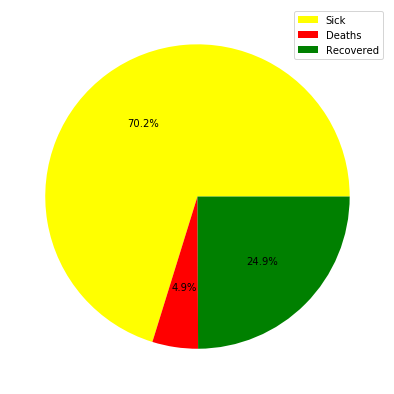

In [7]:
plt.subplots(figsize=(7,7))
alyze=data1[['Confirmed','Deaths','Recovered']].sum()
alyze['Confirmed']=alyze['Confirmed']-alyze['Deaths']-alyze['Recovered']
plt.pie(alyze,autopct='%1.01f%%',colors=['yellow','red','green'])
plt.legend(labels=['Sick','Deaths','Recovered'])
plt.show()

Dari akumulasi jumlah kasus dapat kita lihat perbandingan jumlah kasus terkonfirmasi, kesembuhan dan kematian. Visualisasi diatas menunjukan bahwa persentase kematian dari kasus COVID-19 tidaklah besar kurang lebih sekitar 5%, jauh lebih kecil dari persentase kesembuhan 25%. Namun bagaimana dengan perkembangan Covid-19 sejauh ini....

In [8]:
data1.groupby('ObservationDate').sum().describe()

,Confirmed,Deaths,Recovered
count,7.900000e+01,79.000000,79.000000
mean,2.784079e+05,13503.063291,69417.088608
std,4.074517e+05,22937.348849,85010.073783
min,5.550000e+02,17.000000,28.000000
25%,4.378300e+04,1063.000000,4314.500000
50%,8.837100e+04,2996.000000,42716.000000
75%,2.883580e+05,12136.000000,89539.500000
max,1.595350e+06,95455.000000,353975.000000


Text(0.5, 1.0, 'Growth of Covid-19 in World')

<Figure size 432x288 with 0 Axes>

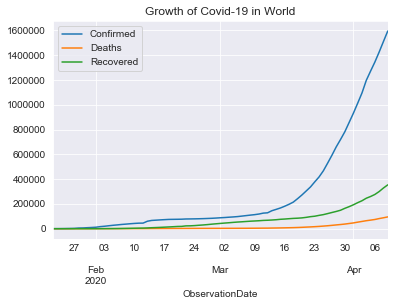

In [75]:
data1.groupby('ObservationDate').sum().plot()
plt.title('Growth of Covid-19 in World')

Terlihat dari data diatas meskipun sebelumnya kita telah mengetahui bahwa tingkat kematian cukup kecil(5%) namun tidak dapat dipungkiri penyebaran virus corona masih berkembang sangat pesat perharinya bahkan mencapai angka 1600000 kasus dalam satu hari di seluruh dunia. Lalu negara mana saja yang sudah terinfeksi cukup besar ???

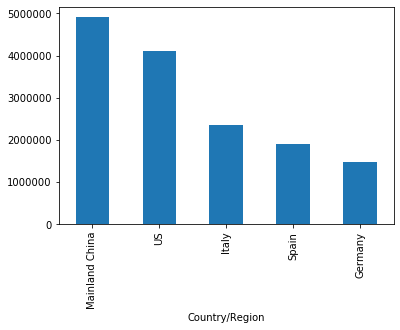

In [9]:
data1.groupby('Country/Region').Confirmed.sum().sort_values(ascending=False).head().plot(kind='bar')

Tidak dapat dipungkiri China sebagai tempat awal berkembangnya virus corona menjadi negara dengan kasus terbanyak. Negara negara lainnya terdapat yaitu Amerika Serikat yang hampir menyamai China, lalu disusul oleh italia, spanyol dan jerman. Dari 3 negara terbesar tersebut kita akan lihat perkembangan virus disana.

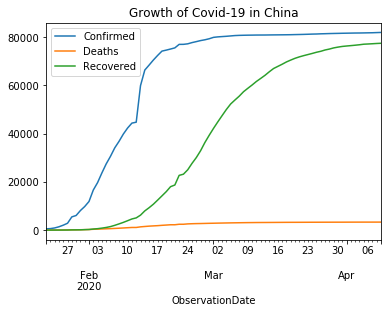

In [10]:
data1[data1['Country/Region']=='Mainland China'].groupby('ObservationDate').sum().plot()
plt.title('Growth of Covid-19 in China')
plt.show()

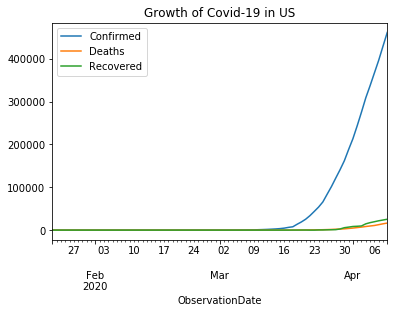

In [11]:
data1[data1['Country/Region']=='US'].groupby('ObservationDate').sum().plot()
plt.title('Growth of Covid-19 in US')
plt.show()

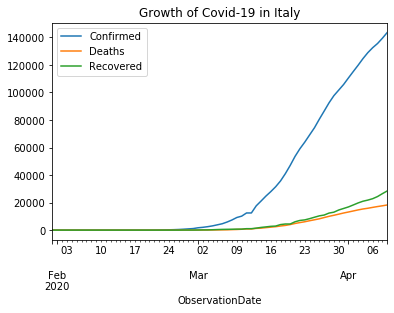

In [12]:
data1[data1['Country/Region']=='Italy'].groupby('ObservationDate').sum().plot()
plt.title('Growth of Covid-19 in Italy')
plt.show()

Data Amerika Serikat dan Italia menunjukan perkembangan pesat yang jika dilihat secara kasat mata tidak jauh berbeda dengan perkembangan data dari seluruh dunia. Namun dari data China terlihat bahwa jumlah kasus baru sudah cenderung stabil, tidak hanya itu angka kesembuhan juga turut meningkat dan mulai mengimbangi jumlah kasus baru, tingkat kematian pun cenderung stabil rendah. Ini mengindikasikan adanya kemungkinan bahwa China sudah menerapkan penanggulangan  kasus Covid-19 yang cukup efektif dan periode wabah Covid-19 pada negara tersebut sudah pada masa akhirnya.

# Data 2

In [13]:
data2=pd.read_csv('data/COVID19_line_list_data.csv')

In [14]:
total=data2.isnull().sum().sort_values(ascending=False)
percentage=(data2.isnull().sum()/data2.isnull().count()).sort_values(ascending=False)
miss_val=pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])
miss_val

,Total,Percentage
Unnamed: 26,1085,1.000000
Unnamed: 25,1085,1.000000
Unnamed: 24,1085,1.000000
Unnamed: 23,1085,1.000000
Unnamed: 22,1085,1.000000
Unnamed: 21,1085,1.000000
Unnamed: 3,1085,1.000000
exposure_start,957,0.882028
symptom,815,0.751152
exposure_end,744,0.685714


In [15]:
data2.drop(columns=miss_val[miss_val['Percentage']>=0.9].index,inplace=True)
data2.columns

Index(['id', 'case_in_country', 'reporting date', 'summary', 'location',
       'country', 'gender', 'age', 'symptom_onset', 'If_onset_approximated',
       'hosp_visit_date', 'exposure_start', 'exposure_end', 'visiting Wuhan',
       'from Wuhan', 'death', 'recovered', 'symptom', 'source', 'link'],
      dtype='object')

In [16]:
data2.sample(5)

,id,case_in_country,reporting date,summary,location,country,gender,age,symptom_onset,If_onset_approximated,hosp_visit_date,exposure_start,exposure_end,visiting Wuhan,from Wuhan,death,recovered,symptom,source,link
424,425,189.0,2/27/2020,new confirmed COVID-19 patient in Japan: Nagoy...,Nagoya City,Japan,female,65.0,2/26/2020,0.0,2/26/2020,NaN,NaN,0,0.0,0,0,fever,Ministry of Health,https://www.mhlw.go.jp/stf/houdou/houdou_list_...
1041,1042,9.0,2/21/2020,new confirmed COVID-19 patient in Iran: Qom,Qom,Iran,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0,0,0,NaN,Iran Ministry of Health,http://behdasht.gov.ir/news/%DA%A9%D8%B1%D9%88...
1022,1023,27.0,2/28/2020,new confirmed COVID-19 patient in Spain: Andal...,Andalusia,Spain,male,42.0,NaN,NaN,NaN,NaN,NaN,0,0.0,0,0,NaN,The Local,https://www.thelocal.es/20200228/covid-19-what...
618,619,76.0,2/20/2020,new confirmed COVID-19 patient in South Korea:...,South Korea,South Korea,male,36.0,NaN,NaN,NaN,NaN,NaN,0,0.0,0,0,NaN,KCDC,https://www.cdc.go.kr/board/board.es?mid=a3040...
942,943,72.0,2/23/2020,new confirmed COVID-19 patient in Hong Kong: m...,Hong Kong,Hong Kong,male,62.0,02/10/20,0.0,2/22/2020,NaN,NaN,0,0.0,0,0,NaN,Government HK,https://www.dh.gov.hk/textonly/eindex.html


In [17]:
data2['Have_Visit_Wuhan']=data2['visiting Wuhan']+data2['from Wuhan']

In [18]:
data2.loc[data2['Have_Visit_Wuhan'].isnull()==True,'Have_Visit_Wuhan']=data2.loc[data2['Have_Visit_Wuhan'].isnull()==True,'visiting Wuhan']
data2.loc[data2['Have_Visit_Wuhan']==2,'Have_Visit_Wuhan']=1

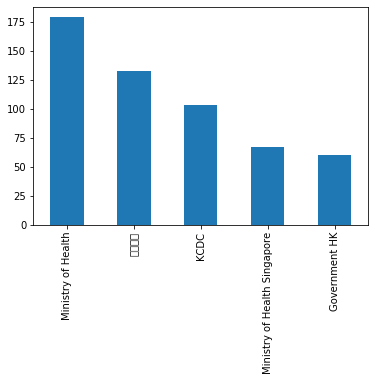

In [20]:
data2.source.value_counts().sort_values(ascending=False).head().plot(kind='bar')

Sumber informasi pada data ini berasal dari Ministry of Health

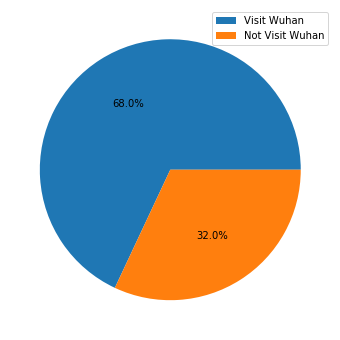

In [21]:
plt.subplots(figsize=(6,6))
plt.pie(data2['Have_Visit_Wuhan'].value_counts(),autopct='%1.01f%%')
plt.legend(labels=['Visit Wuhan','Not Visit Wuhan'])
plt.show()

Pasien yang dilaporkan lebih banyak yang sudah mengunjungi Wuhan. Ini mengindikasikan bahwa Wuhan menjadi sumber penyebaran Covid-19. Lalu bagaimana dengan karakteristik Covid-19 sendiri ? 

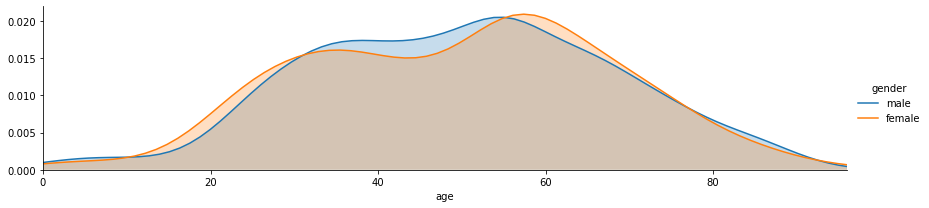

In [22]:
fig = sns.FacetGrid(data2,hue='gender',aspect=4)
fig.map(sns.kdeplot, 'age', shade=True)
oldest = data2['age'].max()
fig.set(xlim=(0, oldest))
fig.add_legend()
plt.show()

Terlihat distribusi umur pasien rata2 berkisar antara 40-60 

In [23]:
data2[['reporting date','symptom_onset']]=data2[['reporting date','symptom_onset']].astype('datetime64')
data2['difference']=data2['reporting date']-data2['symptom_onset']
alyze2=data2.loc[data2.difference.isnull()==False,'difference'].apply(lambda x : int(str(x).split()[0]))

In [24]:
data2['reporting date'].unique()

array(['2020-01-20T00:00:00.000000000', '2020-01-21T00:00:00.000000000',
       '2020-01-22T00:00:00.000000000', '2020-01-23T00:00:00.000000000',
       '2020-01-24T00:00:00.000000000', '2020-01-25T00:00:00.000000000',
       '2020-01-26T00:00:00.000000000', '2020-01-27T00:00:00.000000000',
       '2020-01-28T00:00:00.000000000', '2020-01-29T00:00:00.000000000',
       '2020-01-30T00:00:00.000000000', '2020-02-08T00:00:00.000000000',
       '2020-02-15T00:00:00.000000000', '2020-02-25T00:00:00.000000000',
       '2020-02-26T00:00:00.000000000', '2020-02-27T00:00:00.000000000',
       '2020-02-28T00:00:00.000000000', '2020-01-15T00:00:00.000000000',
       '2020-01-31T00:00:00.000000000', '2020-02-01T00:00:00.000000000',
       '2020-02-04T00:00:00.000000000', '2020-02-05T00:00:00.000000000',
       '2020-02-10T00:00:00.000000000',                           'NaT',
       '2020-02-13T00:00:00.000000000', '2020-02-14T00:00:00.000000000',
       '2020-02-16T00:00:00.000000000', '2020-02-17

In [26]:
data2[data2['reporting date']>='2020-02-16']

,id,case_in_country,reporting date,summary,location,country,gender,age,symptom_onset,If_onset_approximated,...,exposure_end,visiting Wuhan,from Wuhan,death,recovered,symptom,source,link,Have_Visit_Wuhan,difference
209,210,13.0,2020-02-25,new confirmed COVID-19 patient in France: fema...,Paris,France,female,33.0,NaT,NaN,...,NaN,0,0.0,0,0,NaN,French Ministry of Health,https://solidarites-sante.gouv.fr/soins-et-mal...,0.0,NaT
210,211,14.0,2020-02-25,new confirmed COVID-19 patient in France: male...,Annecy,France,male,63.0,NaT,NaN,...,NaN,0,0.0,0,0,NaN,French Ministry of Health,https://solidarites-sante.gouv.fr/soins-et-mal...,0.0,NaT
211,212,15.0,2020-02-26,new confirmed COVID-19 patient in France: male...,Amiens,France,male,55.0,NaT,NaN,...,NaN,0,0.0,0,0,NaN,French Ministry of Health,https://solidarites-sante.gouv.fr/soins-et-mal...,0.0,NaT
212,213,16.0,2020-02-26,new confirmed COVID-19 patient in France: male...,Strasbourg,France,male,36.0,NaT,NaN,...,NaN,0,0.0,0,0,NaN,French Ministry of Health,https://solidarites-sante.gouv.fr/soins-et-mal...,0.0,NaT
213,214,17.0,2020-02-26,new confirmed COVID-19 patient in France: male...,Paris,France,male,60.0,NaT,NaN,...,NaN,0,0.0,2/26/2020,0,NaN,French Ministry of Health,https://solidarites-sante.gouv.fr/soins-et-mal...,0.0,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,1081,2.0,2020-02-25,"new COVID-19 patient confirmed in Austria: 24,...",Innsbruck,Austria,NaN,24.0,NaT,NaN,...,NaN,0,0.0,0,0,NaN,Jakarta Post,https://www.thejakartapost.com/news/2020/02/25...,0.0,NaT
1081,1082,1.0,2020-02-24,new COVID-19 patient confirmed in Afghanistan:...,Afghanistan,Afghanistan,NaN,35.0,NaT,NaN,...,NaN,0,0.0,0,0,NaN,Fox News,https://www.foxnews.com/health/afghanistan-fir...,0.0,NaT
1082,1083,1.0,2020-02-26,new COVID-19 patient confirmed in Algeria: mal...,Algeria,Algeria,male,NaN,NaT,NaN,...,2/17/2020,0,0.0,0,0,NaN,South China Morning Post,https://www.scmp.com/news/china/society/articl...,0.0,NaT
1083,1084,1.0,2020-02-25,new COVID-19 patient confirmed in Croatia: mal...,Croatia,Croatia,male,NaN,NaT,NaN,...,2/21/2020,0,0.0,0,0,NaN,Reuters,https://www.reuters.com/article/us-croatia-cor...,0.0,NaT


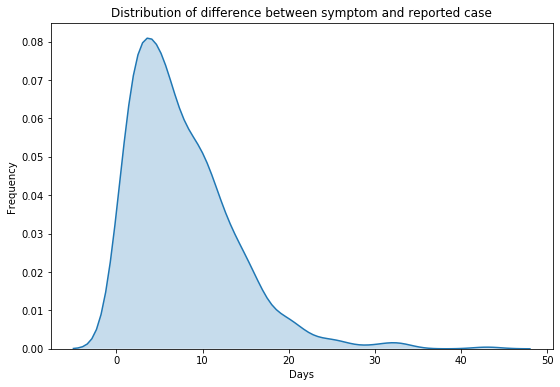

In [27]:
alyze2=data2.loc[data2.difference.isnull()==False,'difference'].apply(lambda x : int(str(x).split()[0]))
plt.subplots(figsize=(9,6))
plt.title('Distribution of difference between symptom and reported case')
sns.kdeplot(alyze2,shade=True,legend=False)
plt.xlabel('Days')
plt.ylabel('Frequency')
plt.show()

Lamanya pasien dinyatakan positif dari mulai muncul gejala adalah sekitar 1 minggu.

In [28]:
data2.symptom.unique()

array([nan, 'feaver, cough, difficult in breathing', 'fever',
       'cough, chills, joint pain', 'fever, cough', 'throat pain, fever',
       'fever, runny nose', 'fatigue', 'fever, abdominal pain, diarrhea',
       'cold, fever, pneumonia', 'cough, joint pain',
       'vomiting, diarrhea, fever, cough', 'fever, loss of appetite',
       'fever, cough, malaise', 'fever, headache',
       'fatigue, difficulty breathing', 'fever, malaise',
       'fever, vomiting, diarrhea', 'fever, pneumonia',
       'fever, cough, sputum, malaise',
       'fatigue, muscle pain, joint pain, fever', 'fever, sore throat',
       'fever, breathlessness, malaise',
       'cough, malaise, shortness of breath', 'cough, sputum, dyspnea',
       'fever, malaise, diarrhea, cough', 'fever, cough, sputum',
       'fatigue, loss of appetite', 'fever, cough, breathlessness',
       'cough, fever, headache, nausea, vomiting, diarrhea',
       'cough, fever', 'fatigue, cold, fever, vomiting',
       'fever, fatigue, 

In [29]:
data2.loc[data2.symptom=='feaver, cough, difficult in breathing','symptom']='fever, cough, breathlessness'
data2.loc[data2.symptom=='throat pain, fever','symptom']='sore throat, fever'
data2.loc[data2.symptom=='difficulty breathing','symptom']='breathlessness'
data2.loc[data2.symptom=='fever, difficulty breathing','symptom']='fever, breathlessness'
data2.loc[data2.symptom=='mild cough, sputum, throat discomfort','symptom']='cough, sputum, sore throat'
data2.loc[data2.symptom=='fever, chills, joint pain, heavy head','symptom']='fever, chills, joint pain, headache'
data2.loc[data2.symptom=='throat discomfort, cough, chest pain','symptom']='sore throat, cough, chest pain'
data2.loc[data2.symptom=='throat pain, chills','symptom']='sore throat, chills'
data2.loc[data2.symptom=='mild fever','symptom']='fever'
data2.loc[data2.symptom=='high fever, chills, muscle pain','symptom']='fever, chills, muscle pain'
data2.loc[data2.symptom=='cough with sputum','symptom']='cough, sputum'
data2.loc[data2.symptom=='feve\\','symptom']='fever'
data2.loc[data2.symptom=='fever, chills, sore throat, runny nose, shortness of breath','symptom']='fever, chills, sore throat, runny nose, breathlessness'

In [30]:
alyze1=data2.loc[data2.symptom.isnull()==False,'symptom'].apply(lambda x : x.split(', '))

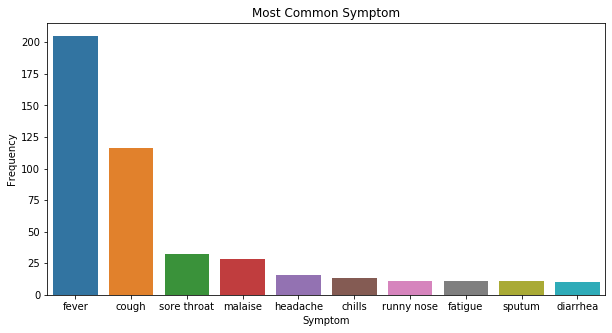

In [31]:
count=Counter()
for row in alyze1:
    count.update(Counter(combinations(row,1)))
keys=[]
values=[]
for key,value in count.most_common(10):
    keys.append(key[0])
    values.append(value)
plt.subplots(figsize=(10,5))
sns.barplot(keys,values)
plt.xlabel('Symptom')
plt.ylabel('Frequency')
plt.title('Most Common Symptom')
plt.show()

Gejala yang paling banyak terjadi pada pasien Covid-19 adalah demam, batuk, dan sakit tenggorokan.

Secara garis besar kita peroleh karakteristik dari pasien Covid-19 ini berupa :
- Umur berkisar antara 40-60 
- Masa Inkubasi penyakit sekitar 1 minggu
- Gejala yang umum terjadi demam, batuk, dan sakit tenggorokan

# Data 3

In [32]:
corona = pd.read_csv('data/corona_latest.csv')
corona.head()

,Unnamed: 0,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/ 1M pop
0,0,USA,400546,211,12857,16,21711,365978,9169,1210.0,39.0,2082431,6291
1,1,Spain,141942,0,14045,0,43208,84689,7069,3036.0,300.0,355000,7593
2,2,Italy,135586,0,17127,0,24392,94067,3792,2243.0,283.0,755445,12495
3,3,France,109069,0,10328,0,19337,79404,7131,1671.0,158.0,224254,3436
4,4,Germany,107663,0,2016,0,36081,69566,4895,1285.0,24.0,918460,10962


In [33]:
corona.describe()

,Unnamed: 0,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/ 1M pop
count,211.00000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,2.110000e+02,211.000000
mean,105.00000,6791.526066,9.919431,389.270142,0.483412,1432.943128,4969.312796,227.165877,467.763507,17.455450,4.868678e+04,4490.184834
std,61.05462,33132.295703,38.538517,1964.112927,2.040882,7261.136204,27783.165354,1064.371863,1169.333748,79.532681,1.818599e+05,11201.315024
min,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,52.50000,19.500000,0.000000,0.500000,0.000000,2.000000,17.500000,0.000000,9.500000,0.000000,0.000000e+00,0.000000
50%,105.00000,248.000000,0.000000,5.000000,0.000000,30.000000,159.000000,2.000000,76.000000,0.700000,1.669000e+03,419.000000
75%,157.50000,1474.500000,0.000000,34.000000,0.000000,131.000000,1097.500000,24.000000,323.500000,6.000000,2.555600e+04,3896.000000
max,210.00000,400546.000000,346.000000,17127.000000,16.000000,77279.000000,365978.000000,9169.000000,8739.000000,1002.000000,2.082431e+06,105458.000000


In [37]:
fig = go.Figure()
fig.add_trace(go.Bar(
    x=corona["Country,Other"][corona.TotalCases>=5000],
    y=corona.TotalCases[corona.TotalCases>=5000],
    name='TotalCases',
    marker_color='#636EFA',
    text=corona.TotalCases[corona.TotalCases>=5000],
    textposition='auto'
))
fig.add_trace(go.Bar(
    x=corona["Country,Other"][corona.TotalCases>=5000],
    y=corona["TotalRecovered"][corona.TotalCases>=5000],
    name='TotalRecovered',
    marker_color='#2ca02c',
    text=corona.TotalRecovered[corona.TotalCases>=5000],
    textposition='auto'
))

fig.add_trace(go.Bar(
    x=corona["Country,Other"][corona.TotalCases>=5000],
    y=corona.TotalDeaths[corona.TotalCases>=5000],
    name='TotalDeaths',
    marker_color='#EF553B',
    text=corona.TotalDeaths[corona.TotalCases>=5000],
    textposition='auto'
))
fig.update_layout(title_text='Corona virus TotalCase greater than 5000',xaxis_tickfont_size=14,
    yaxis=dict(
        title='COUNT',
        titlefont_size=16,
        tickfont_size=14))
fig.show()

Data diatas menunjukkan data statistik negara dengan jumlah kasus Covid-19 lebih dari 5000 sampai 8 April 2020. Terlihat bahwa negara Amerika Serikat memiliki jumlah kasus Covid-19 terbanyak yaitu sebesar 400546. Berbeda jauh dengan China sebagai negara asal virus tersebut. China bahkan menjadi negara dengan persentase kesembuhan terbesar di dunia.	

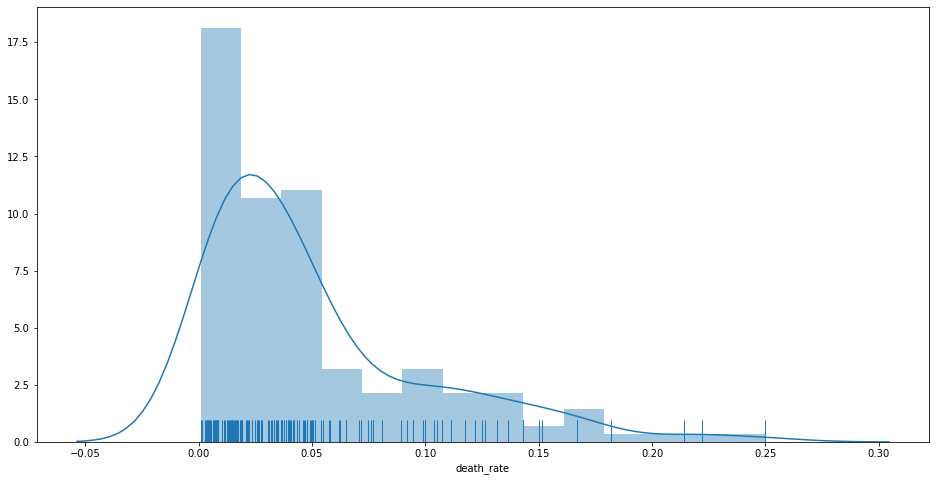

In [38]:
corona['death_rate']=corona['TotalDeaths']/corona['TotalCases']
plt.figure(figsize=(16,8))
p1 = sns.distplot(corona.loc[corona['death_rate']>0,'death_rate'], kde=True, rug=True)

Tingkat kematian kasus Covid-19 di beberapa negara berada di bawah 5%

## Berikut Peta Intensitas Kasus Covid-19 di Seluruh Dunia

In [40]:
fig = go.Figure()
fig.add_trace(go.Choropleth(
        locationmode = 'country names',
        locations = corona["Country,Other"],
        z = corona.TotalCases,
        text = corona["Country,Other"],
        #colorscale = [[0,'rgb(0, 0, 0)'],[1,'rgb(0, 0, 0)']],
        colorscale='Rainbow',
        autocolorscale = False,
        showscale = True,
        geo = 'geo'
    ))

# Kesimpulan

Di dunia perkembangan Covid-19 cukup pesat. Amerika menjadi negara dengan jumlah kasus terbesar hingga awal April ini.
Cina menjadi salah satu negara yang kondisi pandemi coronanya mulai stabil.
Disarankan untuk mengambil pelajaran dari cara penanggulangan kasus dan
atau melakukan studi lebih lanjut di sana. <br>
Dari data kasus - kasus yang dilaporkan, kebanyakan pasien telah mengunjungi Wuhan, dengan karakteristik rata-rata usia pasien sekitar 40-60 tahun dan kebanyakan memiliki gejala awal berupa demam, batuk, dan sakit tenggorokan dengan masa inkubasi sekitar satu minggu.